### The goal of this project is to develop a *machine learning model* that can predict whether an employee will **leave the company or not**.The dataset comprises various features related to employees,such as education, joining year, experience and everbenched etc.
### By the end of this project, we expect to have a robust predictive model that accurately identifies employees of leaving. This will help the organization improve employee satisfaction, and reduce turnover rates.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score

#### Read Dataset

In [2]:
df=pd.read_csv(r'E:\DATASCIENCE\ML project file\Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


#### Information about Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
duplicates= df.duplicated().sum()
duplicates

1889

In [6]:
new_data= df.drop_duplicates()
new_data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [7]:
new_data.duplicated().sum()

0

In [8]:
new_data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
new_data.count()

Education                    2764
JoiningYear                  2764
City                         2764
PaymentTier                  2764
Age                          2764
Gender                       2764
EverBenched                  2764
ExperienceInCurrentDomain    2764
LeaveOrNot                   2764
dtype: int64

In [10]:
new_data.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

#### 1.How many employees have each level of education?

In [11]:
education_counts=new_data['Education'].value_counts().reset_index()
education_counts


,index,Education
0,Bachelors,1971
1,Masters,637
2,PHD,156


#### 2.How does the age related across different cities and payment Tiers?

In [12]:
age_stats = new_data.groupby(['City', 'PaymentTier'])['Age'].mean().reset_index()
age_stats

,City,PaymentTier,Age
0,Bangalore,1,30.346535
1,Bangalore,2,29.305085
2,Bangalore,3,31.810089
3,New Delhi,1,29.636364
4,New Delhi,2,30.615385
5,New Delhi,3,30.145558
6,Pune,1,29.790323
7,Pune,2,30.900990
8,Pune,3,30.837156


#### 3.Does the level of education relate with the experience in the current domain?

In [13]:
education_experience = df.groupby('Education')['ExperienceInCurrentDomain'].mean().reset_index()
education_experience

,Education,ExperienceInCurrentDomain
0,Bachelors,2.910580
1,Masters,2.884307
2,PHD,2.910615


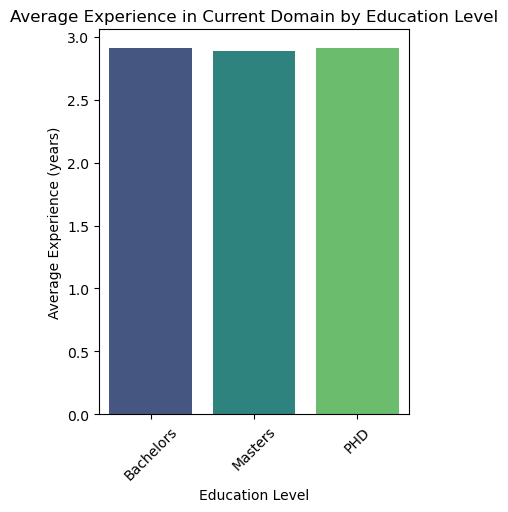

In [14]:
plt.figure(figsize=(4, 5))
sns.barplot(data=education_experience, x='Education', y='ExperienceInCurrentDomain', palette='viridis')
plt.title('Average Experience in Current Domain by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Experience (years)')
plt.xticks(rotation=45)
plt.show()

#### 4.What percentage of employees have left the company?

In [15]:
total_employees = len(new_data)
employees_left = new_data['LeaveOrNot'].sum()  # Assuming 1 represents leaving, and 0 represents staying
percentage_left = (employees_left / total_employees) * 100
print(f"Percentage of employees who have left the company: {percentage_left:.2f}%")

Percentage of employees who have left the company: 39.36%


#### 5.Is there a relation between joining year and the chance of leaving the company?


In [16]:
#the leave rate per joining year

leave_rate_by_year = new_data.groupby('JoiningYear')['LeaveOrNot'].mean() * 100
leave_rate_by_year

JoiningYear
2012    26.948052
2013    43.181818
2014    30.909091
2015    41.379310
2016    28.387097
2017    30.362538
2018    97.907950
Name: LeaveOrNot, dtype: float64

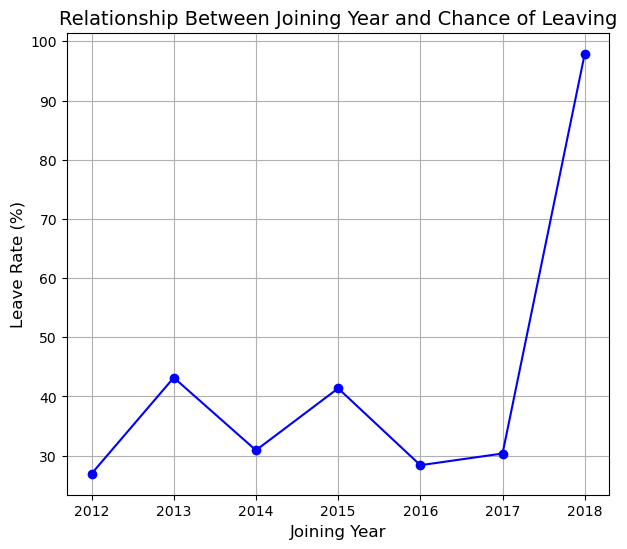

In [17]:
plt.figure(figsize=(7, 6))
plt.plot(leave_rate_by_year.index, leave_rate_by_year.values, marker='o', color='b')
plt.title('Relationship Between Joining Year and Chance of Leaving', fontsize=14)
plt.xlabel('Joining Year', fontsize=12)
plt.ylabel('Leave Rate (%)', fontsize=12)
plt.grid(True)
plt.show()

#### 6.Is there a relation between Education and the chance of leaving the company?

In [18]:
leave_rate_by_education = new_data.groupby('Education')['LeaveOrNot'].mean() * 100
leave_rate_by_education

Education
Bachelors    37.493658
Masters      48.508634
PHD          25.641026
Name: LeaveOrNot, dtype: float64

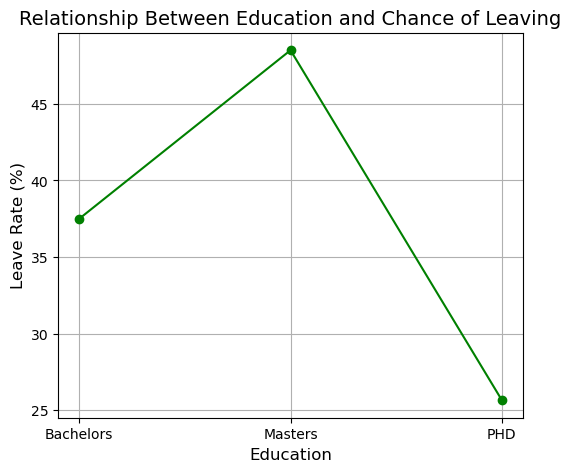

In [19]:
plt.figure(figsize=(6,5))
plt.plot(leave_rate_by_education.index, leave_rate_by_education.values, marker='o', color='g')
plt.title('Relationship Between Education and Chance of Leaving', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Leave Rate (%)', fontsize=12)
plt.grid(True)
plt.show()

#### 7.What is the average experience in the current domain for employees?

In [20]:
average_experience = df['ExperienceInCurrentDomain'].mean()
print(f"The average experience in the current domain for employees is: {average_experience:.2f} years")


The average experience in the current domain for employees is: 2.91 years


#### 8. Is there a significant relationship between an employee's age and their likelihood of leaving the organization?

In [21]:
relation = pd.crosstab(new_data['Age'], new_data['LeaveOrNot'])
relation

LeaveOrNot,0,1
Age,,
22,17,14
23,28,13
24,80,81
25,79,88
26,85,94
27,116,102
28,224,141
29,116,64
30,112,74


In [22]:
max_left_age = relation[1].idxmax() 
max_left_age

28

In [23]:
max_left_count = relation[1].max()
max_left_count

141

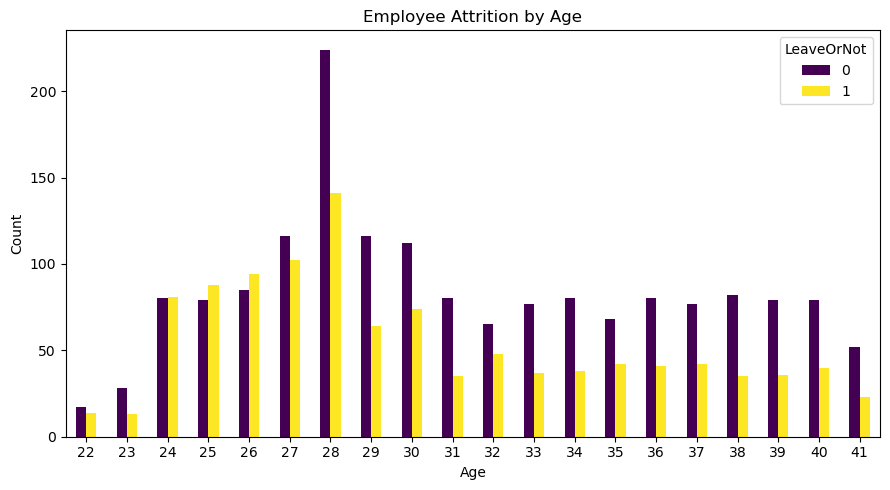

In [24]:
relation.plot(kind='bar', figsize=(9, 5), colormap='viridis') 
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title('Employee Attrition by Age') 
plt.xticks(rotation=0) # Show the plot plt.tight_layout()
plt.tight_layout()
plt.show()

### From this graph with ages ***24 to 28*** showing **high** turnover rates.This suggests that younger employees, especially those in their mid to late 20s, are more likely to leave the company.Organizations may need to focus on engagement and development programs tailored for this age group to improve retention.

KNN Algorith

In [25]:
new_data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [26]:
df=pd.DataFrame(new_data)
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [27]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})

In [28]:
df['EverBenched']=df['EverBenched'].replace({'No':0,'Yes':1})

In [29]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,0,0,0,0
1,Bachelors,2013,Pune,1,28,1,0,3,1
2,Bachelors,2014,New Delhi,3,38,1,0,2,0
3,Masters,2016,Bangalore,3,27,0,0,5,1
4,Masters,2017,Pune,3,24,0,1,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,1,0,2,0
4647,Bachelors,2016,Pune,3,30,0,0,2,0
4649,Masters,2013,Pune,2,37,0,0,2,1
4650,Masters,2018,New Delhi,3,27,0,0,5,1


In [30]:
d_f = df.drop('City', axis=1)
d_f


,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,3,34,0,0,0,0
1,Bachelors,2013,1,28,1,0,3,1
2,Bachelors,2014,3,38,1,0,2,0
3,Masters,2016,3,27,0,0,5,1
4,Masters,2017,3,24,0,1,2,1
...,...,...,...,...,...,...,...,...
4645,Masters,2017,2,31,1,0,2,0
4647,Bachelors,2016,3,30,0,0,2,0
4649,Masters,2013,2,37,0,0,2,1
4650,Masters,2018,3,27,0,0,5,1


In [31]:
x=d_f.iloc[:,1:-1]
y=d_f.iloc[:,-1]


In [32]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [33]:
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test) 
print(y_pred)


[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 1 

In [35]:
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 68.31


Decission Tree Algorithm

In [36]:
x=d_f.iloc[:,1:-1]
y=d_f.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0) 
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred) 


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 

In [41]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 67.29


Random Tree

In [42]:
x=d_f.iloc[:,1:-1]
y=d_f.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 

In [46]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 68.35


Support vector machine learning (SVM)

In [47]:
x=d_f.iloc[:,1:-1]
y=d_f.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)

In [50]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)


[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 

In [51]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 63.29


Logistics Algorithm

In [52]:
x=d_f.iloc[:,1:-1]
y=d_f.iloc[:,-1]

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)


[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 1 

In [56]:
print('Accuracy :%.2f' % (accuracy*100))

Accuracy :62.75


Naive Bayes Algorithm

In [57]:
x=d_f.iloc[:,1:-1]
y=d_f.iloc[:,-1]

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)

In [60]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)


[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 

In [61]:
print('Accuracy :%.2f' % (accuracy*100))

Accuracy :60.94


HyperParameter Tuning

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Comparing the models with default hyperparameter values using cross Validation 

In [63]:
x=d_f.iloc[:,1:-1]
y=y=d_f.iloc[:,-1]

In [64]:
x=np.asarray(x)
y=np.asarray(y)
model=[LogisticRegression(max_iter=1000), SVC(kernel='linear',random_state=0), RandomForestClassifier(random_state=0), KNeighborsClassifier(metric='minkowski')]

def Com_mo_val():
    for i in model:
        
        Cv_score=cross_val_score(i,x,y,cv=5)
        mean_accu=sum(Cv_score)/len(Cv_score)
        mean_accu=mean_accu*100
        mean_accu=round(mean_accu,2)

        print('cross validation accuracies for the ', i,'=',Cv_score)
        print('Acurracy scofre of the ', i,'=',mean_accu,'%')
        print('-----------------------------------------------')

In [65]:
Com_mo_val()

cross validation accuracies for the  LogisticRegression(max_iter=1000) = [0.59493671 0.5840868  0.66726944 0.60578662 0.63405797]
Acurracy scofre of the  LogisticRegression(max_iter=1000) = 61.72 %
-----------------------------------------------
cross validation accuracies for the  SVC(kernel='linear', random_state=0) = [0.62025316 0.60216998 0.60578662 0.63110307 0.57971014]
Acurracy scofre of the  SVC(kernel='linear', random_state=0) = 60.78 %
-----------------------------------------------
cross validation accuracies for the  RandomForestClassifier(random_state=0) = [0.61844485 0.59674503 0.7124774  0.72151899 0.72644928]
Acurracy scofre of the  RandomForestClassifier(random_state=0) = 67.51 %
-----------------------------------------------
cross validation accuracies for the  KNeighborsClassifier() = [0.60940325 0.55153707 0.65461121 0.6636528  0.67934783]
Acurracy scofre of the  KNeighborsClassifier() = 63.17 %
-----------------------------------------------


Comparing the models with different Hyperparameter values using GridsearchCV

In [66]:
model_list=[LogisticRegression(max_iter=10000), SVC(),
            KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

#Creating s dictionary that contains hyperparameter values for the above mentioned models
Mo_hyper={
    'Log_reg_hyper':{
        'C':[1,5,10,20]
    },
    'SVC_hyper':{
        
        'kernel':['linear','poly','rbf','sigmoid'],
         'C':[1,5,10,20]
    },
    'KNN_hyper':{
        'n_neighbors':[3,5,10]
        
        
    },
    'Ran_for_hyper':{
        'criterion':['gini', 'entropy', 'log_loss'],
         'n_estimators':[10,20,40,60]
    }
         
}
Model_keys=list(Mo_hyper.keys())

Applying GridSearch CV

In [67]:
def Modelselect(List_model, Hyper_dict):
    result=[]
    i=0
    for model in List_model:
        key=Model_keys[i]
        params=Hyper_dict[key]
        i+=1
        print(model)
        print(params)
        print('-----------------------------')

        classifier=GridSearchCV(model,params,cv=5)
        classifier.fit(x,y)
        result.append({
            "model used":model,
            "highest score":classifier.best_score_,
            "Best hyperparameter":classifier.best_params_
        })
    result_df=pd.DataFrame(result,columns=['model used','highest score','Best hyperparameter'])   
    return result_df

In [68]:
Modelselect(model_list,Mo_hyper)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
-----------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
-----------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
-----------------------------
RandomForestClassifier(random_state=0)
{'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': [10, 20, 40, 60]}
-----------------------------


,model used,highest score,Best hyperparameter
0,LogisticRegression(max_iter=10000),0.617590,{'C': 5}
1,SVC(),0.607805,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.663539,{'n_neighbors': 10}
3,RandomForestClassifier(random_state=0),0.676579,"{'criterion': 'entropy', 'n_estimators': 60}"


Random Forest Classifier with n_estimators=60 and criterion "gini" have the maximum accurrecy.

In [69]:
#Doing with test and train data with random forest classifier with n_eliminators=60 and criterion: gini

x=d_f.iloc[:,1:-1]
y=d_f.iloc[:,-1]

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test= st_x.fit_transform(x_test)

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 60, criterion="gini")
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
print(y_pred)
accuracy=accuracy_score(y_test,y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 

In [73]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 65.46


Saving and testing model using Pickle

In [74]:
import pickle
with open('model_pkl.pkl', 'wb') as files:
    pickle.dump(classifier, files)
# load saved model
with open('model_pkl.pkl' , 'rb') as f:
    lr = pickle.load(f)

y_pred= lr.predict(x_test)
print(y_pred)

accuracy=accuracy_score(y_test,y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 

In [75]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 65.46
